In [1]:
from libra_toolbox.neutron_detection.activation_foils.calibration import (
    check_source_ba133,
    check_source_co60,
    check_source_cs137,
    check_source_na22,
    check_source_mn54,
)
from libra_toolbox.neutron_detection.activation_foils.compass import Measurement, CheckSourceMeasurement

run_dir = "250317_BABY_1L_run3/DAQ"


check_source_measurements = {
    "Co60_1": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_240317/UNFILTERED",
        "check_source": check_source_co60,
    },
    "Co60_2": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250318_run2/UNFILTERED",
        "check_source": check_source_co60,
    },
    "Co60_3": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Marc2014_250319_run3/UNFILTERED",
        "check_source": check_source_co60,
    },
    "Co60_4": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Marc2014_250320_run4/UNFILTERED",
        "check_source": check_source_co60,
    },
    "Cs137_1": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep23_240317/UNFILTERED",
        "check_source": check_source_cs137,
    },
    "Cs137_2": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run2/UNFILTERED",
        "check_source": check_source_cs137,
    },
    "Cs137_3": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": check_source_cs137,
    },
    "Cs137_4": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": check_source_cs137,
    },
    "Mn54_1": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250318/UNFILTERED",
        "check_source": check_source_mn54,
    },
    "Mn54_2": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250319_run2/UNFILTERED",
        "check_source": check_source_mn54,
    },
    "Mn54_3": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250320_run3/UNFILTERED",
        "check_source": check_source_mn54,
    },
    "Na22_1": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep23_240317/UNFILTERED",
        "check_source": check_source_na22,
    },
    "Na22_2": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep23_240317_run2/UNFILTERED",
        "check_source": check_source_na22,
    },
    "Na22_3": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": check_source_na22,
    },
    "Na22_4": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run4/UNFILTERED",
        "check_source": check_source_na22,
    },
    "Na22_5": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": check_source_na22,
    },
}

background_dir = f"{run_dir}/Background_250322/UNFILTERED"


In [2]:
all_measurements = {}

for name, values in check_source_measurements.items():
    print(f"Processing {name}...")
    meas = CheckSourceMeasurement.from_directory(values["directory"], name=name)
    meas.check_source = values["check_source"]
    print(meas)
    all_measurements[name] = meas

print(f"Processing background...")
background_meas = Measurement.from_directory(
    background_dir,
    name="Background",
    info_file_optional=True,
)

Processing Co60_1...
No root file found, assuming all counts are live
Processing Co60_2...
Processing Co60_3...
Processing Co60_4...
Processing Cs137_1...
No root file found, assuming all counts are live
Processing Cs137_2...
Processing Cs137_3...
Processing Cs137_4...
Processing Mn54_1...
Processing Mn54_2...
Processing Mn54_3...
Processing Na22_1...
No root file found, assuming all counts are live
Processing Na22_2...
No root file found, assuming all counts are live
Processing Na22_3...
Processing Na22_4...
Processing Na22_5...
Processing background...


/home/remidm/libra-toolbox/libra_toolbox/neutron_detection/activation_foils/compass.py:286: UserWarning: run.info file not found. Assuming start and stop time are not needed.
  warnings.warn(


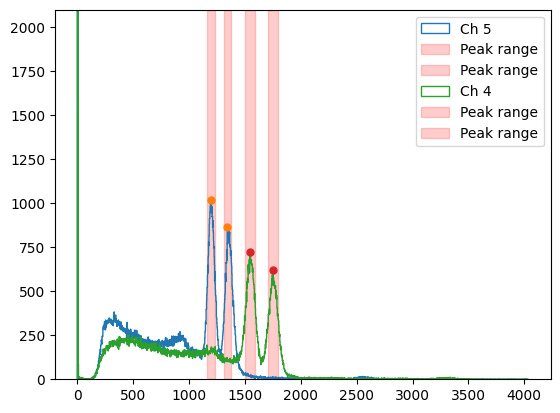

In [3]:
import matplotlib.pyplot as plt
from libra_toolbox.neutron_detection.activation_foils import peak_fitting

for detector in all_measurements["Co60_3"].detectors:
    hist, bin_edges = detector.get_energy_hist(bins="double")

    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist,
        histtype="step",
        label=f"Ch {detector.channel_nb}",
    )
    peaks = peak_fitting.get_peaks(hist, source=all_measurements["Co60_3"].check_source.nuclide)
    # plt.plot(bin_edges[peaks], hist[peaks], '.', ms=10)

    from scipy.signal import find_peaks
    import numpy as np

    start_index = 400
    height = 0.60 * np.max(hist[start_index:])
    prominence = None
    width = [10, 150]
    distance = 30
    peaks, peak_data = find_peaks(
        hist[start_index:],
        prominence=prominence,
        height=height,
        width=width,
        distance=distance,
    )
    plt.plot(bin_edges[start_index:][peaks], peak_data["peak_heights"], ".", ms=10)

    for i, p in enumerate(peaks):
        width = peak_data["widths"][i]
        plt.axvspan(
            bin_edges[start_index:][p] - width,
            bin_edges[start_index:][p] + width,
            color="red",
            alpha=0.2,
            label="Peak range",
        )

plt.legend()
# plt.yscale("log")
plt.ylim(top=2100)
plt.show()

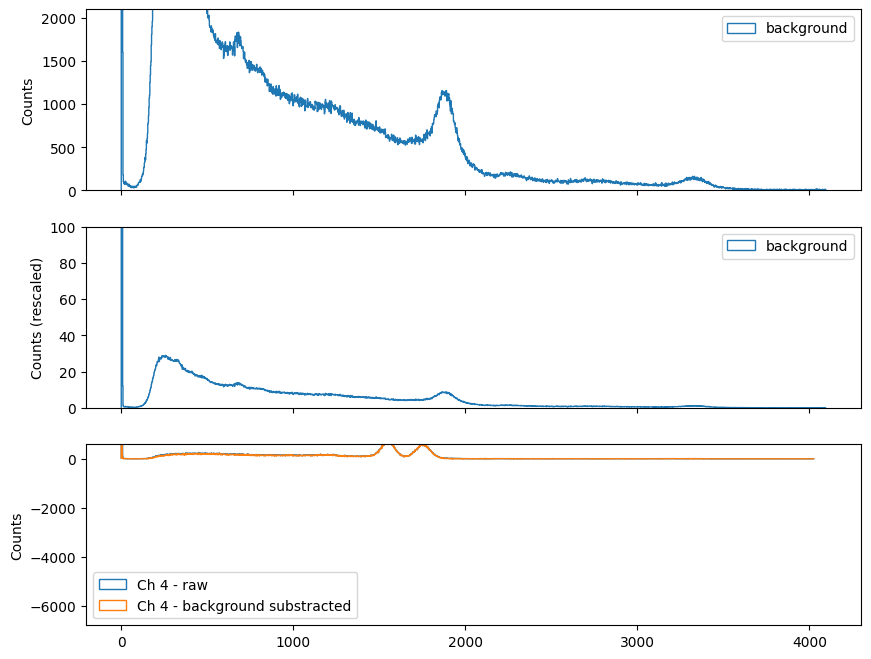

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


background_time = background_meas.detectors[1].real_count_time
bg_hist_scale = hist * all_measurements["Co60_3"].detectors[1].real_count_time / background_time 
plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=bg_hist_scale,
    histtype="step",
    label=f"background",
)
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Co60_3"].detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = all_measurements["Co60_3"].detectors[1].get_energy_hist_background_substract(background_detector, bins="double")

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(top=600)
plt.show()

/tmp/ipykernel_927866/2939631474.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


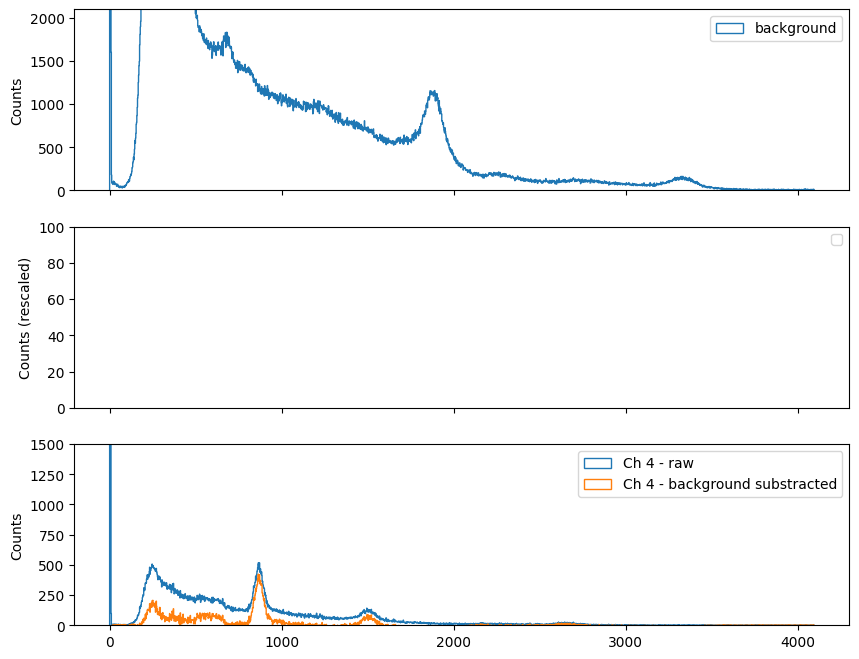

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


# background_time = background_meas.detectors[1].real_count_time
# bg_hist_scale = hist * all_measurements["Mn54_1"].detectors[1].real_count_time / background_time 
# plt.hist(
#     bin_edges[:-1],
#     bins=bin_edges,
#     weights=bg_hist_scale,
#     histtype="step",
#     label=f"background",
# )
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Mn54_1"].detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = all_measurements["Mn54_1"].detectors[1].get_energy_hist_background_substract(background_detector, bins="double")

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(bottom=0, top=1500)
plt.show()

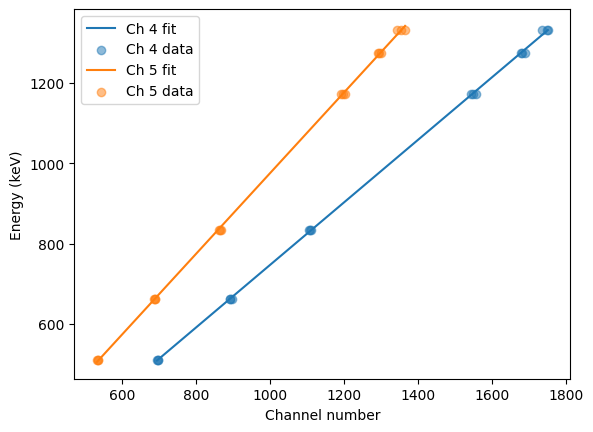

In [6]:
calibration_coeffs = {}

for channel_nb in [4, 5]:
    calibration_channels, calibration_energies = peak_fitting.get_calibration_data(
        all_measurements,
        background_measurement=background_meas,
        channel_nb=channel_nb,
    )

    coeff = np.polyfit(calibration_channels, calibration_energies, 1)
    calibration_coeffs[channel_nb] = coeff
    
    xs = np.linspace(
        calibration_channels[0],
        calibration_channels[-1],
    )
    plt.plot(
        xs,
        np.polyval(coeff, xs),
        label=f"Ch {channel_nb} fit",
    )
    plt.scatter(
        calibration_channels,
        calibration_energies,
        label=f"Ch {channel_nb} data",
        alpha=0.5,
    )
plt.xlabel("Channel number")
plt.ylabel("Energy (keV)")
plt.legend()
plt.show()


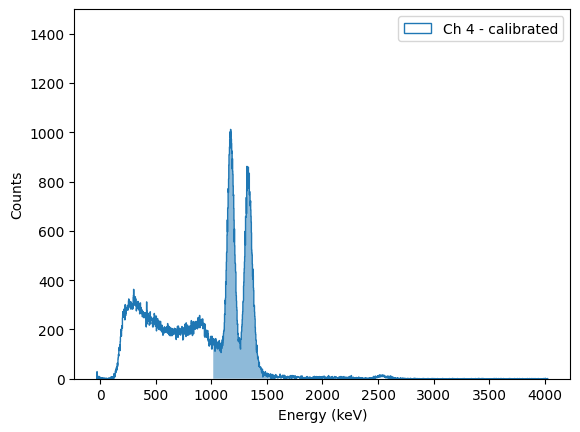

In [7]:
ch_nb = 5

background_detector = background_meas.detectors[0]
check_source_detector = all_measurements["Co60_3"].detectors[0]

assert background_detector.channel_nb == check_source_detector.channel_nb
assert (
    background_detector.channel_nb == ch_nb
), f"Channel number mismatch: {background_detector.channel_nb} != {ch_nb}"

hist, bin_edges = check_source_detector.get_energy_hist_background_substract(
    background_detector, bins="double"
)

calibrated_bin_bedges = np.polyval(calibration_coeffs[ch_nb], bin_edges)

xvals = np.diff(calibrated_bin_bedges) / 2 + calibrated_bin_bedges[:-1]

parameters, covariance = peak_fitting.fit_peak_gauss(
    hist, xvals, all_measurements["Co60_3"].check_source.energy, search_width=800
)

# plotting

peak_start = 520
peak_end = 800
plt.fill_between(
    xvals[peak_start:peak_end],
    peak_fitting.gauss(xvals[peak_start:peak_end], *parameters),
    alpha=0.5,
)

plt.hist(
    calibrated_bin_bedges[:-1],
    bins=calibrated_bin_bedges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - calibrated",
)
plt.ylabel("Counts")

plt.legend()
plt.xlabel("Energy (keV)")
plt.ylim(bottom=0, top=1500)
plt.show()

In [8]:
ch_nb = 5

background_detector = background_meas.detectors[0]
check_source_detector = all_measurements["Co60_3"].detectors[0]

assert background_detector.channel_nb == check_source_detector.channel_nb
assert (
    background_detector.channel_nb == ch_nb
), f"Channel number mismatch: {background_detector.channel_nb} != {ch_nb}"


efficiency = peak_fitting.compute_detection_efficiency(
    check_source_detector=check_source_detector,
    background_detector=background_detector,
    check_source_meas=all_measurements["Co60_3"],
    calibration_coeffs=calibration_coeffs[ch_nb],
)

print(f"Detection efficiency: {efficiency}")

Detection efficiency: [0.02704431 0.02559813]


In [ ]:
sample_measurements_directories = {
    "niobium_1": f"{run_dir}/Niobium_250318_1253_count1/UNFILTERED",
    "niobium_2": f"{run_dir}/Niobium_250319_1124_count2/UNFILTERED",
    "niobium_3": f"{run_dir}/Niobium_250321_0935_count3/UNFILTERED",
    "zirconium_1": f"{run_dir}/Zirconium_1L_3_240317_2312/UNFILTERED",
    "zirconium_2": f"{run_dir}/Zirconium_250318_2219_count2/UNFILTERED",
    "zirconium_3": f"{run_dir}/Zirconium_250320_1042_count3/UNFILTERED",
}

all_sample_measurements = {}

for sample, directory in sample_measurements_directories.items():
    print(f"Processing {sample}...")
    meas = Measurement.from_directory(directory, name=sample)
    print(meas)
    all_sample_measurements[sample] = meas


Processing niobium_1...
Processing niobium_2...
Processing niobium_3...
